# Introdução às Abordagens de Aprendizado de Máquina - KNN e K-Means

## Parte 1: Conceitos Fundamentais de Aprendizado de Máquina
Começaremos com uma breve introdução ao que é Aprendizado de Máquina. Explicaremos a diferença entre Aprendizado Supervisionado (como KNN) e Aprendizado Não Supervisionado (como K-Means).



### **O que é Aprendizado de Máquina?**
Em termos simples, o aprendizado de máquina é como ensinar um computador a aprender com exemplos, para que ele possa fazer previsões ou tomar decisões sem precisar ser programado para cada detalhe.


<center><img src="https://media.giphy.com/media/iPj5oRtJzQGxwzuCKV/giphy.gif?cid=790b7611r44rsb6wi4jsohfc1ohr73er7x57ud0bqvguai28&ep=v1_gifs_search&rid=giphy.gif&ct=g" width="450" height="350" alt="ML"></center>




### Aprendizado Supervisionado vs. Não Supervisionado:

- **Supervisionado:** O algoritmo é treinado com um conjunto de dados rotulados (cada dado tem uma classe ou valor alvo associado). O objetivo é aprender a mapear as características de entrada para a saída desejada. KNN é um exemplo clássico.
<center><img src="https://media.giphy.com/media/xepQrrT6lxQTm/giphy.gif?cid=790b7611uh6luswat7b2hfm1wc3eqai2cmkjec5yc0fqwy6n&ep=v1_gifs_search&rid=giphy.gif&ct=g" width="450" height="350" alt="SML"></center>

- **Não Supervisionado:** O algoritmo trabalha com dados não rotulados. O objetivo é descobrir padrões, estruturas ou agrupamentos nos dados. K-Means é um exemplo típico.


<center><img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcDYwaWc2bndpa3JmcWJsbjlkaW52YWljaGVocWQ5NnhweGtsenh3ZSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/PCU1qlnDuJfE0HZVbi/giphy.gif" width="450" height="350" alt="USML"></center>


### **Conceitos-chave:**

- **Dados:** 📊 A base de tudo. Precisamos de dados para treinar e testar nossos modelos.🧠

- **Características (Features):** 📌 Atributos que descrevem os dados. Cada detalhe conta!

- **Algoritmos:** ⚙️ As "receitas" que processam os dados e criam modelos. Misturando ingredientes para o sucesso! 🧪

- **Modelo:** 🧠 A representação aprendida a partir dos dados. O resultado do nosso trabalho árduo! 💪

- **Previsão (ou Clusterização):** 🔮 O resultado do modelo, seja uma previsão de valor ou a atribuição a um grupo. A revelação final! ✨

- **Acurácia:** 💯 Uma medida de quão bem o modelo está funcionando. A precisão que buscamos!🎯

- **Variável alvo (Target):** 📈 Nos modelos de aprendizado supervisionado, é a variável que queremos prever (ex: preço de uma casa, probabilidade de um cliente comprar um produto). É o que o modelo tenta "adivinhar"! 🤔

## **Parte 2: K-Nearest Neighbors (KNN)**

KNN é um algoritmo de aprendizado supervisionado usado para classificação e regressão. Ele classifica um novo ponto de dados com base na maioria dos seus vizinhos mais próximos no espaço de características.

In [ ]:
import pandas as pd

# Cria um dataset de teste
data_knn = {'Idade': [25, 32, 45, 28, 38, 22, 50, 30, 27, 40],
        'Gênero': ['Masculino', 'Feminino', 'Masculino', 'Feminino', 'Masculino', 'Feminino', 'Masculino', 'Feminino', 'Masculino', 'Feminino'],
        'Renda Anual': [40000, 60000, 80000, 50000, 70000, 35000, 90000, 55000, 45000, 75000],
        'Interesses': ['Esportes,Tecnologia,Viagens', 'Moda,Cinema,Gastronomia', 'Leitura,Música Clássica,Jardinagem', 'Tecnologia,Jogos,Viagens', 'Gastronomia,Arte,Música Popular', 'Moda,Música Pop,Dança', 'Leitura,História,Colecionismo', 'Cinema,Teatro,Viagens de Aventura', 'Esportes,Jogos,Tecnologia', 'Gastronomia,Jardinagem,Artesanato'],
        'Atividades ao Ar Livre': [1, 0, 1, 1, 0, 0, 0, 1, 1, 1]}

df_knn = pd.DataFrame(data_knn)

In [ ]:
df_knn.head()

,Idade,Gênero,Renda Anual,Interesses,Atividades ao Ar Livre
0,25,Masculino,40000,"Esportes,Tecnologia,Viagens",1
1,32,Feminino,60000,"Moda,Cinema,Gastronomia",0
2,45,Masculino,80000,"Leitura,Música Clássica,Jardinagem",1
3,28,Feminino,50000,"Tecnologia,Jogos,Viagens",1
4,38,Masculino,70000,"Gastronomia,Arte,Música Popular",0


### **Como funciona:**

- **Escolha um valor de K:** O número de vizinhos mais próximos a serem considerados.
<center><img src="https://media.giphy.com/media/7fpxIH9g9i8la/giphy.gif?cid=790b7611d6rskbbxxj3h65gopnvt0351g7v1aubxjvif21fg&ep=v1_gifs_search&rid=giphy.gif&ct=g" width="450" height="350" alt="neighbors"></center>

Imagine que você está em uma festa e quer descobrir se vai gostar ou não de uma nova pessoa. Você não conhece essa pessoa, mas pode observar as pessoas que já conhece.
O valor de K é o número de pessoas que você vai observar para decidir se vai gostar da nova pessoa.
- Se K=3, você observa as 3 pessoas mais próximas de você (em termos de interesses e características).
- Se K=5, você observa 5 pessoas, e assim por diante.

**Um K muito pequeno pode ser influenciado por "vizinhos" muito específicos e atípicos, enquanto um K muito grande pode levar a decisões menos precisas.**



- **Calcule a distância:** Calcule a distância entre o novo ponto de dados e todos os pontos de dados no conjunto de treinamento.

Para decidir quais são as 3 pessoas mais próximas (K=3), você precisa medir a "distância" entre você (novo ponto de dados) e cada pessoa na festa. Essa distância não é física, mas sim em termos de semelhança de interesses. Se uma pessoa gosta muito de esportes e tecnologia, assim como você, a distância entre vocês é pequena. Se uma pessoa gosta apenas de moda e cinema, a distância é maior. Para medir essa distância as mais comuns são:

  - **A Euclidiana** - seria como medir a distância em linha reta entre dois pontos em um gráfico, considerando todos os seus interesses.

<center><img src="https://media.giphy.com/media/fAQKNhWUIzRbPevYsQ/giphy.gif?cid=790b76117b6b0lm35s9t4mq7o6rmkcdpc5sgnqnl7j528txb&ep=v1_gifs_search&rid=giphy.gif&ct=g" width="350" height="350" alt="euclidean"></center>


  - **E a Manhattan** - seria como medir a distância andando apenas em ruas retas (somente horizontalmente ou verticalmente em um gráfico)

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSixnoMbr5uWzVlUCYkWAUGPFO44G0bMuOr-g&s" width="350" height="350" alt="manhattan"></center>


  - **Visualizando as Duas** - A distância euclidiana é a hipotenusa de um triângulo retângulo, enquanto a distância de Manhattan é a soma dos catetos.
   
<center><img src="https://medidassimdist.wordpress.com/wp-content/uploads/2019/04/image-11.png" width="550" height="350" alt="both_distance"></center>


  - **Qual distância escolher** - Experimente ambas as distâncias e avalie o desempenho do seu modelo usando métricas como acurácia, precisão, recall e F1-score. A distância que resultar no melhor desempenho em sua tarefa específica é a mais adequada. Comece com a distância euclidiana se seus dados são principalmente **contínuos e com escalas similares**; caso contrário, considere a distância de Manhattan, especialmente se você tem **dados categóricos ou discretos**.

- **Encontre os K vizinhos mais próximos:** Depois de medir a "distância" entre você e todas as pessoas na festa, você seleciona as 3 pessoas (K=3) mais parecidas com você em termos de interesses. Essas são suas 3 vizinhas mais próximas.
<center><img src="https://media.giphy.com/media/N2nQcsIDqQbrG/giphy.gif?cid=ecf05e47lni7r21ov27s365cpt4lq3lovjptn9kr1x5b4lv7&ep=v1_gifs_related&rid=giphy.gif&ct=g" width="650" height="350" alt="chooseK"></center>



- **Classifique:** Agora que você identificou suas 3 vizinhas mais próximas, observe se elas gostam ou não de atividades ao ar livre (a variável alvo no nosso dataset). Se 2 delas gostam e 1 não gosta, o KNN conclui que você provavelmente também vai gostar de atividades ao ar livre, pois essa é a classe mais frequente entre seus 3 vizinhos mais próximos.

**o KNN funciona como um sistema de recomendação baseado na semelhança com os dados que já conhecemos. A escolha de K, a métrica de distância e a quantidade de dados influenciam diretamente na precisão da classificação.**

### **Bora Codar:**
<center><img src="https://media.giphy.com/media/yCmlEez1c3C5OPQgij/giphy.gif?cid=ecf05e47xo1sna6zb9l4yibj866hiuunbd2ed2x8ru0isauw&ep=v1_gifs_search&rid=giphy.gif&ct=g" width="250" height="350" alt="letscode"></center>



Para isso vamos usar o algoritmo da Biblioteca Scikit-learn - **KNeighborsClassifier**.

Detalhes de como funciona e os argumentos que podem ser usados:

https://scikit-learn.org/1.6/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### **Dado o nosso dataset, o que queremos prever?**

**Se a pessoa gosta de atividades ao ar livre, onde:**
 - 0 a pessoa não gosta
 - 1 a pessoa gosta

A maioria dos algoritmos de aprendizado de máquina lidam melhor com várias dos tipo numéricas, portanto precisaremos transformar as nossas colunas categóricas em numéricas

In [ ]:
# verificando os tipos das variáveis/features
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Idade                   10 non-null     int64 
 1   Gênero                  10 non-null     object
 2   Renda Anual             10 non-null     int64 
 3   Interesses              10 non-null     object
 4   Atividades ao Ar Livre  10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes


In [ ]:
df_knn['Gênero'].unique()

array(['Masculino', 'Feminino'], dtype=object)

In [ ]:
df_knn['Interesses'].unique()

array(['Esportes,Tecnologia,Viagens', 'Moda,Cinema,Gastronomia',
       'Leitura,Música Clássica,Jardinagem', 'Tecnologia,Jogos,Viagens',
       'Gastronomia,Arte,Música Popular', 'Moda,Música Pop,Dança',
       'Leitura,História,Colecionismo',
       'Cinema,Teatro,Viagens de Aventura', 'Esportes,Jogos,Tecnologia',
       'Gastronomia,Jardinagem,Artesanato'], dtype=object)

In [ ]:
# Codificação do gênero
le = LabelEncoder()
df_knn['Gênero'] = le.fit_transform(df_knn['Gênero'])

In [ ]:
df_knn['Gênero'].unique()

array([1, 0])

In [ ]:
# Explode a lista em múltiplas linhas
df_exploded = df_knn.copy()
df_exploded['Interesses'] = df_exploded['Interesses'].str.split(',')
df_exploded = df_exploded.explode('Interesses').reset_index()

In [ ]:
df_exploded

,index,Idade,Gênero,Renda Anual,Interesses,Atividades ao Ar Livre
0,0,25,1,40000,Esportes,1
1,0,25,1,40000,Tecnologia,1
2,0,25,1,40000,Viagens,1
3,1,32,0,60000,Moda,0
4,1,32,0,60000,Cinema,0
5,1,32,0,60000,Gastronomia,0
6,2,45,1,80000,Leitura,1
7,2,45,1,80000,Música Clássica,1
8,2,45,1,80000,Jardinagem,1
9,3,28,0,50000,Tecnologia,1


In [ ]:
# Codificação do Interesses
le = LabelEncoder()
df_exploded['Interesses_encod'] = le.fit_transform(df_exploded['Interesses'])

In [ ]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   30 non-null     int64 
 1   Idade                   30 non-null     int64 
 2   Gênero                  30 non-null     int64 
 3   Renda Anual             30 non-null     int64 
 4   Interesses              30 non-null     object
 5   Atividades ao Ar Livre  30 non-null     int64 
 6   Interesses_encod        30 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.8+ KB


Nesse caso o LabelEncoder atribuiu valores para todas as categorias de interesse, porém ela se transformou em uma atribuição Arbitrária... Eu estou dando pesos para cada tipo de interesse e o algoritmo entende que por exemplo que 'Viagens de Aventura' pode ser 18 vezes melhor que 'Arte', o que não é verdade... Afinal todos os interesses tem o mesmo peso e o que importa é se a pessoar tem interesse ou não.

In [ ]:
df_exploded[['Interesses', 'Interesses_encod']].sort_values(by='Interesses_encod')

,Interesses,Interesses_encod
13,Arte,0
29,Artesanato,1
21,Cinema,2
4,Cinema,2
20,Colecionismo,3
17,Dança,4
24,Esportes,5
0,Esportes,5
27,Gastronomia,6
12,Gastronomia,6


In [ ]:
# Remove a coluna usando del
del df_exploded['Interesses_encod']

O que fazer???

In [ ]:
# Aplica get_dummies
df_encoded = pd.get_dummies(df_exploded, columns=['Interesses'],
                            dtype=int)


In [ ]:
df_encoded.head()

,index,Idade,Gênero,Renda Anual,Atividades ao Ar Livre,Interesses_Arte,Interesses_Artesanato,Interesses_Cinema,Interesses_Colecionismo,Interesses_Dança,...,Interesses_Jogos,Interesses_Leitura,Interesses_Moda,Interesses_Música Clássica,Interesses_Música Pop,Interesses_Música Popular,Interesses_Teatro,Interesses_Tecnologia,Interesses_Viagens,Interesses_Viagens de Aventura
0,0,25,1,40000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,25,1,40000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,25,1,40000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,32,0,60000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,32,0,60000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Separar features e target
X = df_encoded.drop(['Atividades ao Ar Livre', 'index'], axis=1)
y = df_encoded['Atividades ao Ar Livre']

O StandardScaler() é uma ferramenta que "normaliza" seus dados, colocando-os em uma escala comum. Isso é importante para garantir que todos os seus dados contribuam igualmente para o aprendizado de um modelo de machine learning e para facilitar a comparação entre diferentes features.

In [ ]:
# Padronização dos dados (opcional, mas recomendado)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
# Treinar o KNN (exemplo com k=3) - Por Padrão já é escolhido a distância euclidiana
knn = KNeighborsClassifier(n_neighbors=3)

# Treina o modelo usando os dados de treinamento
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Faz previsões usando o modelo treinado com dados que ele nunca viu
y_pred = knn.predict(X_test)

# Calcula a precisão das previsões, comparando-as com os valores reais.
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia (Euclidiana):{accuracy}")

Acurácia (Euclidiana):0.6666666666666666


In [ ]:
# KNN com distância de Manhattan
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print(f"Acurácia (Manhattan): {accuracy_manhattan}")

Acurácia (Manhattan): 0.3333333333333333


**Uma acurácia de 0.67 (ou 67%) em um modelo que prevê se uma pessoa gosta ou não de atividades ao ar livre significa que o modelo está correto em suas previsões 67% das vezes.**

Lembre-se que este é um exemplo muito simples, e a acurácia pode ser baixa devido ao tamanho pequeno do dataset. Para um problema real, você precisará de um dataset muito maior e possivelmente mais features relevantes. Você também deve experimentar diferentes valores de k e métricas de distância para otimizar o desempenho. A etapa de escalonamento (StandardScaler) é importante para garantir que todas as features contribuam igualmente para a distância calculada.

## Parte 3: K-Means

K-Means é um algoritmo de aprendizado não supervisionado usado para clusterização. Ele agrupa dados semelhantes em clusters distintos.


In [ ]:
# Cria um dataset de teste
df_kmeans = df_encoded.copy()

In [ ]:
df_kmeans.head()

,index,Idade,Gênero,Renda Anual,Atividades ao Ar Livre,Interesses_Arte,Interesses_Artesanato,Interesses_Cinema,Interesses_Colecionismo,Interesses_Dança,...,Interesses_Jogos,Interesses_Leitura,Interesses_Moda,Interesses_Música Clássica,Interesses_Música Pop,Interesses_Música Popular,Interesses_Teatro,Interesses_Tecnologia,Interesses_Viagens,Interesses_Viagens de Aventura
0,0,25,1,40000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,25,1,40000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,25,1,40000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,32,0,60000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,32,0,60000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# deleta a coluna Alvo que usamos no antigo modelo
del df_kmeans['Atividades ao Ar Livre']


### Como funciona:

- **Escolha o número de clusters (K):** Imagine que você precisa organizar um grupo de amigos em equipes para um jogo. 'K' é o número de equipes que você quer formar. Se K=3, você quer 3 equipes.

<center><img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExdjJ4MGplaDJ1dG5iMWF6em1lb2lxbDVtODU5MmtiNTR4b3RudzE0aiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/WOIGpnJ3ye445BUQl4/giphy.gif" width="450" height="350" alt="group_friends"></center>


- **Inicialize os centróides:** Você escolhe aleatoriamente K pessoas do seu grupo de amigos para serem os "líderes" de cada equipe. Esses líderes são os centróides iniciais. A posição inicial deles é aleatória.

<center><img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExMnoxYXlqNHdsdG5zbTd2aG1yNHpnMGkzYTllaTFobWZ5NTNya3ozYyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/L3c8aAACw7Qpx2ojGB/giphy.gif" width="550" height="350" alt="centroides"></center>


- **Atribua pontos aos clusters:** Cada um dos seus amigos restantes escolhe a equipe cujo líder está mais próximo (em termos de características, interesses, etc.). Por exemplo, se os amigos gostam de cinema, eles se juntam ao líder que também gosta de cinema.
<center><img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExZjl5MGFjbnFsMWZzOTJ0Ymc2aWcyb2QyZWV2OHRodXMyaGh6Z3l6dyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/NPRgEfb3m39wvuphjI/giphy.gif" width="250" height="350" alt="choose_leader"></center>





- **Recalcule os centróides:** Depois que todos escolheram suas equipes, cada equipe escolhe um novo líder. Este novo líder é a "média" das características de todos os membros da equipe. Por exemplo, se uma equipe tem membros que gostam de jogos de tabuleiro e alguns que gostam de ler, o novo líder pode ser alguém que gosta de ambos.

<center><img src="https://media.giphy.com/media/0i2Ozmxz89JPN9zq1c/giphy.gif?cid=790b7611jhl3amuahsmn2asbzintkh7bvsc6ocktgwwi0plc&ep=v1_gifs_search&rid=giphy.gif&ct=gf" width="550" height="350" alt="choose2"></center>




- **Repita os passos 3 e 4:** Você repete os passos 3 e 4. Os amigos escolhem novas equipes baseadas nos novos líderes, e os líderes são recalculados novamente. Você continua esse processo até que as equipes não mudem muito, ou seja, os líderes não mudam de lugar significativamente. Isso significa que as equipes estão organizadas da melhor forma possível de acordo com as características dos seus membros.
<center><img src="https://media.giphy.com/media/lx7AtejahSmgIWmLX5/giphy.gif?cid=790b7611vhkf22sicopbho5o60b7dhf3tuxslyxzqky07jlq&ep=v1_gifs_search&rid=giphy.gif&ct=g" width="450" height="350" alt="loop"></center>

**Em resumo, o K-means é como organizar um grupo de pessoas em equipes, onde as pessoas se juntam à equipe cujo líder é mais parecido com elas, e os líderes são recalculados repetidamente até que as equipes fiquem estáveis. A escolha inicial dos líderes (centróides) é aleatória, mas o algoritmo converge para uma solução final.**

Para isso vamos usar o algoritmo da Biblioteca Scikit-learn - **KMeans**.

Detalhes de como funciona e os argumentos que podem ser usados:

https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Aplicação do K-means (exemplo com k=2)
kmeans = KMeans(n_clusters=2, random_state=0)
df_exploded['Cluster'] = kmeans.fit_predict(df_kmeans.drop('index',axis=1))
df_exploded.head(10)

,index,Idade,Gênero,Renda Anual,Interesses,Atividades ao Ar Livre,Cluster
0,0,25,1,40000,Esportes,1,0
1,0,25,1,40000,Tecnologia,1,0
2,0,25,1,40000,Viagens,1,0
3,1,32,0,60000,Moda,0,0
4,1,32,0,60000,Cinema,0,0
5,1,32,0,60000,Gastronomia,0,0
6,2,45,1,80000,Leitura,1,1
7,2,45,1,80000,Música Clássica,1,1
8,2,45,1,80000,Jardinagem,1,1
9,3,28,0,50000,Tecnologia,1,0


In [ ]:
df_exploded.head()

,index,Idade,Gênero,Renda Anual,Interesses,Atividades ao Ar Livre,Cluster
0,0,25,1,40000,Esportes,1,0
1,0,25,1,40000,Tecnologia,1,0
2,0,25,1,40000,Viagens,1,0
3,1,32,0,60000,Moda,0,0
4,1,32,0,60000,Cinema,0,0


O K-means busca o melhor agrupamento de dados ("centróides" ou "líderes"), e o **"Método do Cotovelo"** ajuda a determinar o número ideal de grupos analisando a distância média entre os pontos e seus centróides. Este método é útil mesmo sem conhecer previamente o número de grupos.
Tem um trabalho muito bem explicado aqui:  https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9


<center><img src="https://media.giphy.com/media/xUA7b4pjBgxRxpzanK/giphy.gif?cid=790b76111ntnnrxl5zwxji47ppffghbfr937mffqsqg9vbct&ep=v1_gifs_search&rid=giphy.gif&ct=g" width="450" height="350" alt="loop"></center>

In [ ]:
# cria um novo dataframe sem o index, pois não queremos enviesamento dos dados
df_final = df_kmeans.drop('index',axis=1)

# Esta linha cria uma lista vazia chamada, para adicionar as distâncias que o algoritmo calcular
Soma_distancias_quadradas = []

# Esta linha cria uma sequência de números inteiros de 2 a 7 (inclusive). Estes números representam os diferentes valores de k (número de clusters) que serão testados no algoritmo K-means.
K = range(2,8)
# Este loop itera sobre cada valor de k na sequência criada na linha anterior.
for k in K:
  #Dentro do loop, esta linha cria um objeto KMeans com o número de clusters definido pelo valor atual de k.
  km = KMeans(n_clusters=k)
  # Esta linha executa o algoritmo K-means no DataFrame df_final usando o objeto KMeans criado na linha anterior. O algoritmo agrupa os dados em k clusters.
  km = km.fit(df_final)
  # Esta linha calcula a soma das distâncias quadradas entre cada ponto de dados e o centróide do cluster ao qual ele pertence (a inertia do modelo). Este valor é então adicionado à lista Soma_distancias_quadradas.
  Soma_distancias_quadradas.append(km.inertia_)

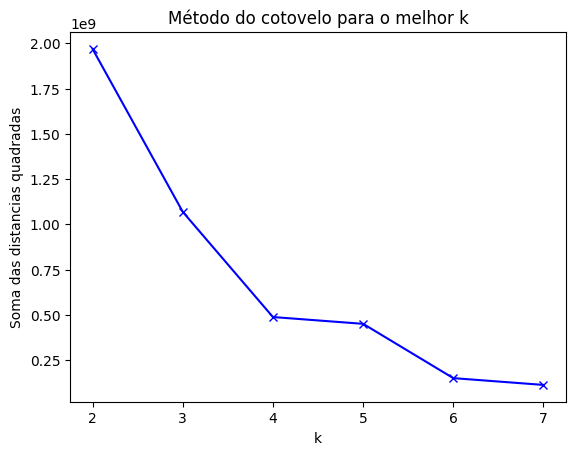

In [ ]:
# Plota um gráfico de linha mostrando a soma das distâncias quadradas em função do número de clusters (k).
plt.plot(K, Soma_distancias_quadradas, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma das distancias quadradas')
plt.title('Método do cotovelo para o melhor k')
plt.show()


In [ ]:
kmeans_2= KMeans(n_clusters=4, random_state=0)
df_exploded['Cluster_2'] = kmeans_2.fit_predict(df_kmeans.drop('index',axis=1))

In [ ]:
df_exploded.head(10)

,index,Idade,Gênero,Renda Anual,Interesses,Atividades ao Ar Livre,Cluster,Cluster_2
0,0,25,1,40000,Esportes,1,0,0
1,0,25,1,40000,Tecnologia,1,0,0
2,0,25,1,40000,Viagens,1,0,0
3,1,32,0,60000,Moda,0,0,3
4,1,32,0,60000,Cinema,0,0,3
5,1,32,0,60000,Gastronomia,0,0,3
6,2,45,1,80000,Leitura,1,1,1
7,2,45,1,80000,Música Clássica,1,1,1
8,2,45,1,80000,Jardinagem,1,1,1
9,3,28,0,50000,Tecnologia,1,0,3


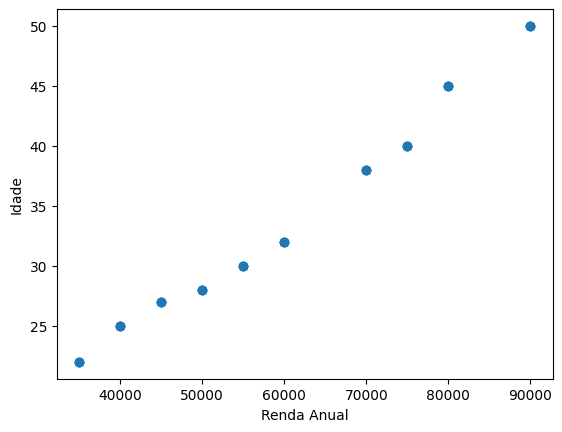

In [ ]:
#plotando os clusters gerados
plt.xlabel('Renda Anual')
plt.ylabel('Idade')
plt.scatter(df_exploded['Renda Anual'], df_exploded['Idade'])

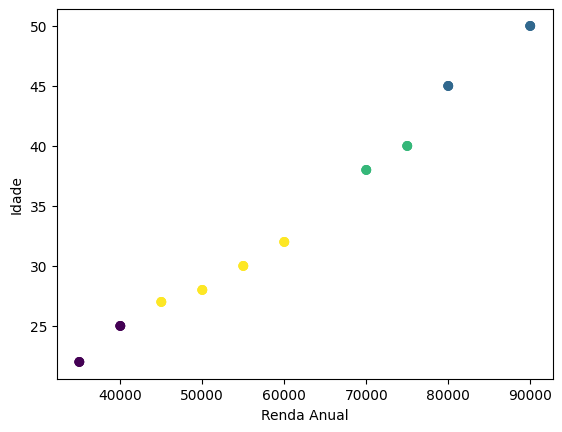

In [ ]:
#plotando os clusters gerados
plt.xlabel('Renda Anual')
plt.ylabel('Idade')
plt.scatter(df_exploded['Renda Anual'], df_exploded['Idade'], c=df_exploded['Cluster_2'])

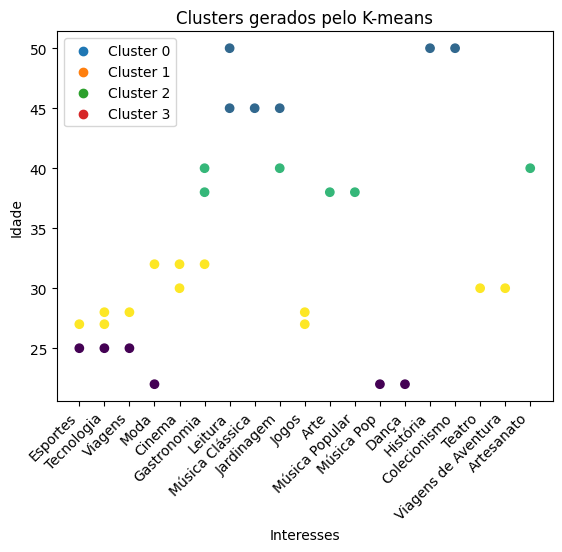

In [ ]:
import numpy as np
unique_labels = np.unique(df_exploded['Cluster_2'])

for label in unique_labels:
    plt.scatter([], [], c=f'C{label}', label=f'Cluster {label}')

plt.xlabel('Interesses')
plt.ylabel('Idade')
plt.scatter(df_exploded['Interesses'], df_exploded['Idade'], c=df_exploded['Cluster_2'], cmap='viridis')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.title('Clusters gerados pelo K-means')
plt.show()

## Muita coisa para assimilar né...

**Desafio Pyladies Fortaleza**

 Escolha um método e crie a sua própria Previsão/Clusterização e poste no seu Linkedin (marque a comunidade) e no seu github.
 E nos convide para dar os feedbacks, será um prazer enorme.

<center><img src="https://media.giphy.com/media/QhmboW0R7eUbm/giphy.gif?cid=790b7611vial0wck238nhqxlbgvyamui71uttairs8fd0jpv&ep=v1_gifs_search&rid=giphy.gif&ct=g" width="450" height="350" alt="loop"></center>

